In [143]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from collections import defaultdict

(1797, 64)


<Figure size 432x288 with 0 Axes>

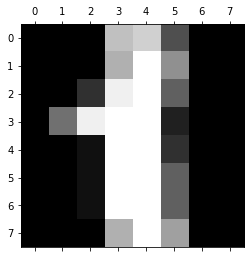

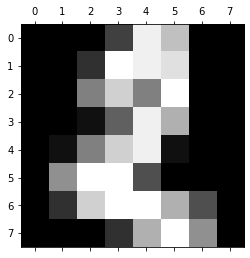

In [63]:
digits = load_digits()
print(digits.data.shape)
(1797, 64)
plt.gray()
plt.matshow(digits.images[1])
plt.matshow(digits.images[2])
plt.show()

In [64]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

**Берем из набора данных цифры 1 и 2.**

In [65]:
X = X[(y == 1) | (y == 2)]
y = y[(y == 1) | (y == 2)]

print(X.shape, y.shape)
np.unique(y)

(359, 64) (359,)


array([1, 2])

**Гауссова наивная байесовская модель.**

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

print('Доля правильных ответов: ', accuracy_score(y_test, y_pred))

Доля правильных ответов:  0.9444444444444444


**Наивный байесовский классификатор.**

In [139]:
class NaiveBayes(object):
    def fit(self, X, y, noise=0.001):
        self.data = []

        for label in np.unique(y):
            Xc = X[y == label]

            self.data.append( ( Xc.mean(axis=0), Xc.var(axis=0) + noise, float(Xc.shape[0]) / len(y) ) )

    def predict(self, X):
        P = np.zeros((X.shape[0], len(self.data)))

        for idx, (mean, var, prior) in enumerate(self.data):
            P[:, idx] = mvn.pdf(X, mean=mean, cov=var) + prior

        return np.argmax(P, axis=1)

In [140]:
model = NaiveBayes()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Доля правильных ответов: ', accuracy_score(y_test, y_pred))

Доля правильных ответов:  0.5462962962962963
